In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Data Loading and Exploration

In [2]:
# Loading data from excel file
df=pd.read_excel('avocado.xlsx')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


This dataset contains 18249 rows and 14 columns.

In [3]:
# Checking all information about our dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


From the output above , we can say that there are no missing values and there are different dtype like datetime64 (1), float64(9), int64(2), object(2) are present.

In [4]:
# Checking number of unique values in each column
uni_val = df.nunique()
uni_val_df = uni_val.reset_index()
uni_val_df.columns = ['Column', 'Unique Values']
uni_val_df

,Column,Unique Values
0,Unnamed: 0,53
1,Date,169
2,AveragePrice,259
3,Total Volume,18237
4,4046,17702
5,4225,18103
6,4770,12071
7,Total Bags,18097
8,Small Bags,17321
9,Large Bags,15082


In [5]:
df.sample(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9512,22,2015-07-26,2.08,3206.72,228.17,1265.39,861.44,851.72,835.05,16.67,0.00,organic,2015,Charlotte
12995,22,2016-07-24,2.17,4109.11,2932.78,193.15,33.18,950.00,940.00,10.00,0.00,organic,2016,Jacksonville
3618,30,2016-05-29,1.05,3925300.14,583307.07,1952011.72,280608.56,1109372.79,868963.09,210973.46,29436.24,conventional,2016,GreatLakes


### Data Cleaning and Feature Engineering

In [6]:
# Dropping irrelevent columns
col_to_drop = ['Unnamed: 0','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df.drop(columns=col_to_drop, inplace=True)

In [7]:
df.sample(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
10475,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,organic,2015,Midsouth
7671,2017-03-19,1.29,250471.76,66618.17,101944.33,2551.00,conventional,2017,RichmondNorfolk
5788,2017-10-01,1.80,58602.78,33499.14,2015.33,5127.60,conventional,2017,Boise


We have successfully dropped the irrelevent columns.

In [8]:
df.shape

(18249, 9)

Now, the dataset contain 18249 rows and 9 columns.

In [9]:
# Checking the name of 2 unique values in types
uni_type = df['type'].unique()
print(uni_type)

['conventional' 'organic']


In [10]:
# Seprating year, month , day from date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df.head())  

        Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

           type  year  region  Year  Month  Day  
0  conventional  2015  Albany  2015     12   27  
1  conventional  2015  Albany  2015     12   20  
2  conventional  2015  Albany  2015     12   13  
3  conventional  2015  Albany  2015     12    6  
4  conventional  2015  Albany  2015     11   29  


In [11]:
# Dropping the 'Date' and 'year' columns
df.drop(columns=['Date', 'year'], inplace=True)
print(df.head())


   AveragePrice  Total Volume     4046       4225    4770          type  \
0          1.33      64236.62  1036.74   54454.85   48.16  conventional   
1          1.35      54876.98   674.28   44638.81   58.33  conventional   
2          0.93     118220.22   794.70  109149.67  130.50  conventional   
3          1.08      78992.15  1132.00   71976.41   72.58  conventional   
4          1.28      51039.60   941.48   43838.39   75.78  conventional   

   region  Year  Month  Day  
0  Albany  2015     12   27  
1  Albany  2015     12   20  
2  Albany  2015     12   13  
3  Albany  2015     12    6  
4  Albany  2015     11   29  


In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encoding the 'type' and 'region' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

In [13]:
df.sample(3)

,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month,Day
12429,1.09,21266.49,545.86,10293.17,0.00,1,9,2016,6,12
3772,0.83,1209996.42,589477.04,236621.03,110054.59,0,18,2016,6,12
15478,1.54,7850.52,724.05,4667.55,0.00,1,13,2017,1,29


All features are in numerical form now.

In [21]:
# Statistical Summary
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,0.499918,26.495644,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.500014,15.583788,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,0.000000,13.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,0.000000,26.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.000000,40.000000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.000000,53.000000,2018.000000,12.000000,31.000000


### Data Visulization

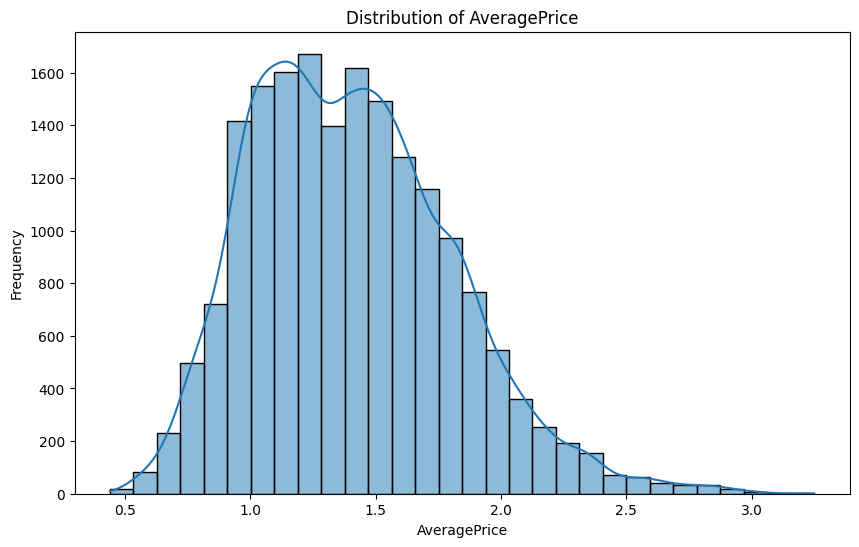

In [14]:
# Histogram for the distribution of AveragePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Frequency')
plt.show()

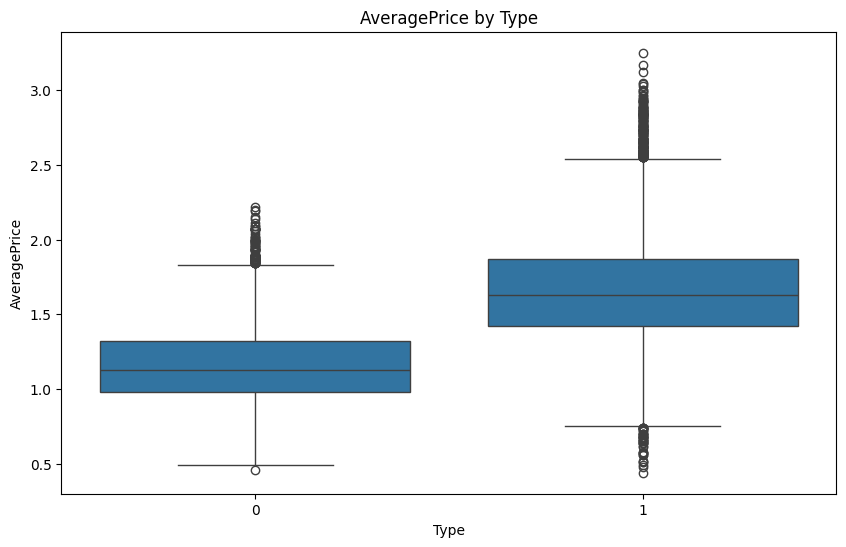

In [15]:
# Boxplot to compare AveragePrice across different types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('AveragePrice by Type')
plt.xlabel('Type')
plt.ylabel('AveragePrice')
plt.show()

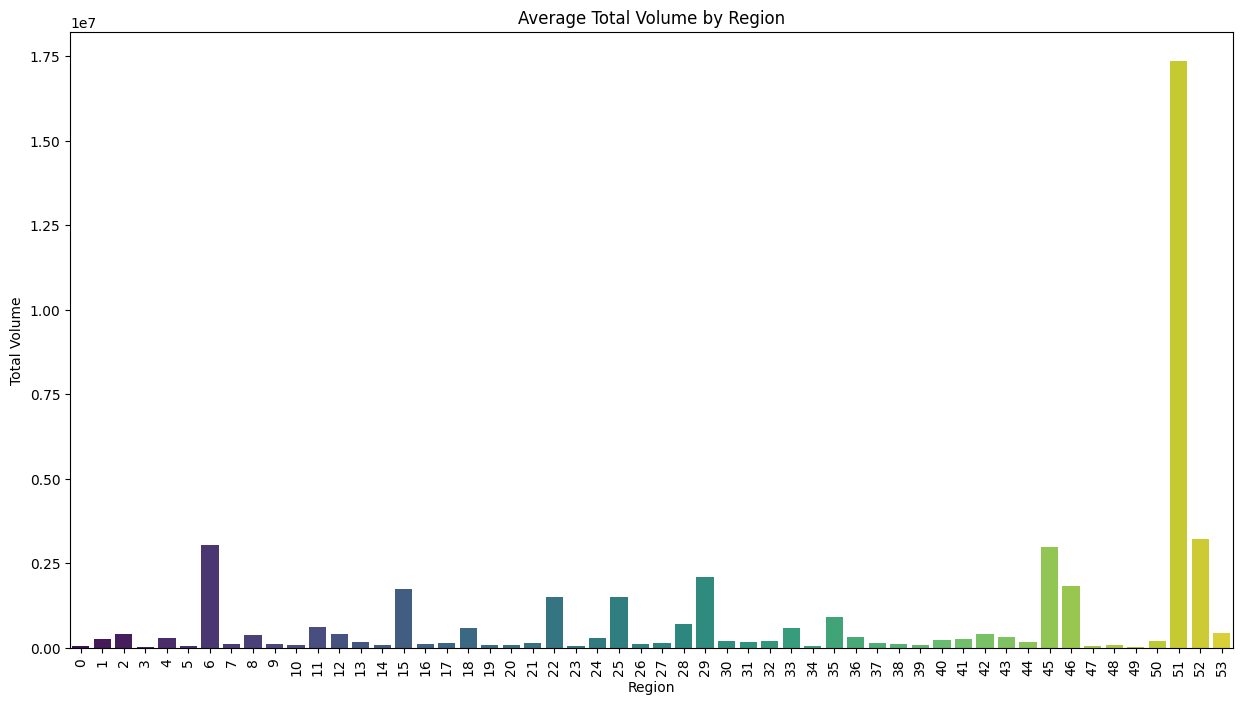

In [18]:
# Bar plot for the average Total Volume sold in different regions
# Calculating the average total volume per region
region_volume = df.groupby('region')['Total Volume'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='region', y='Total Volume', data=region_volume,palette="viridis")
plt.title('Average Total Volume by Region')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.show()

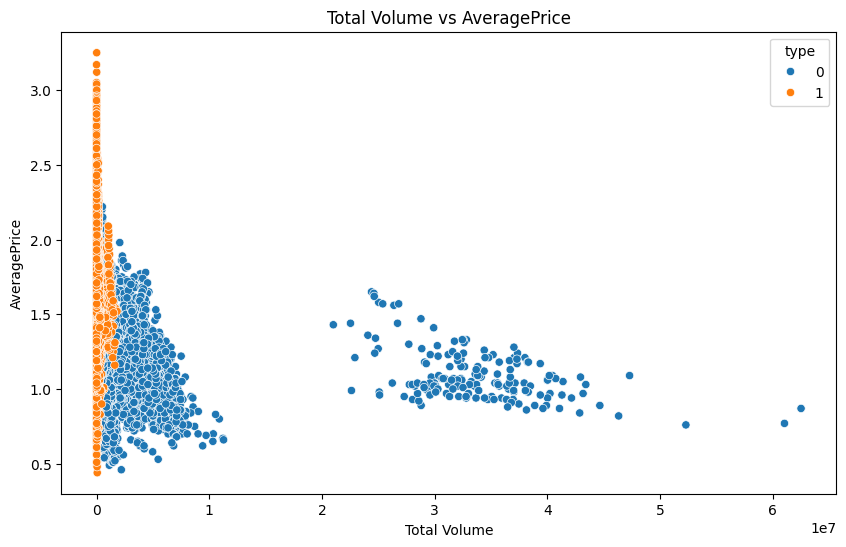

In [19]:
# Scatter plot to show the relationship between Total Volume and AveragePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Volume', y='AveragePrice', hue='type', data=df)
plt.title('Total Volume vs AveragePrice')
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.show()

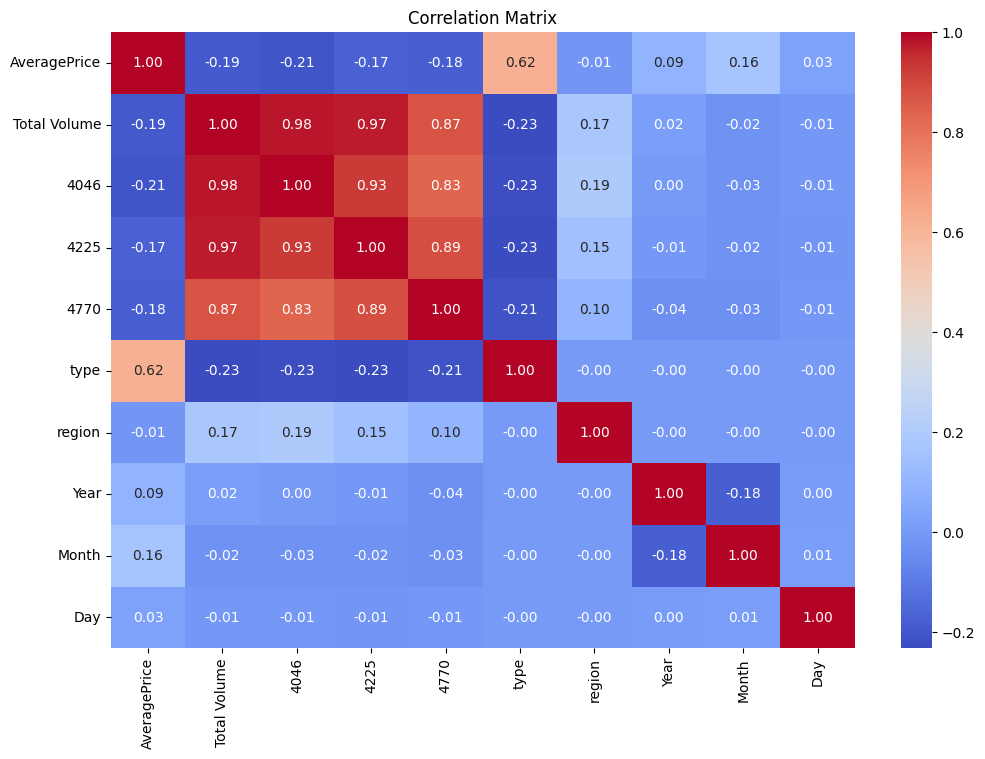

In [20]:
# Heatmap for the correlation matrix of the dataset
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

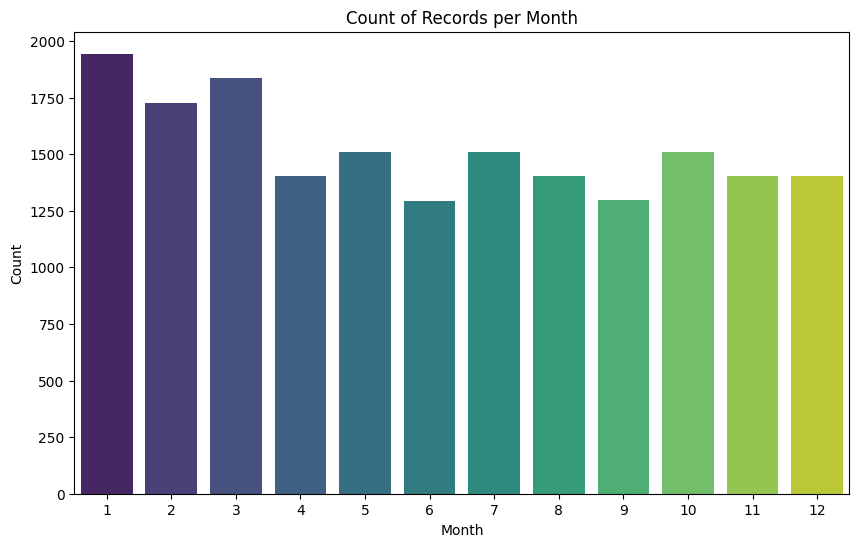

In [23]:
# Creating a countplot 
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Count of Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

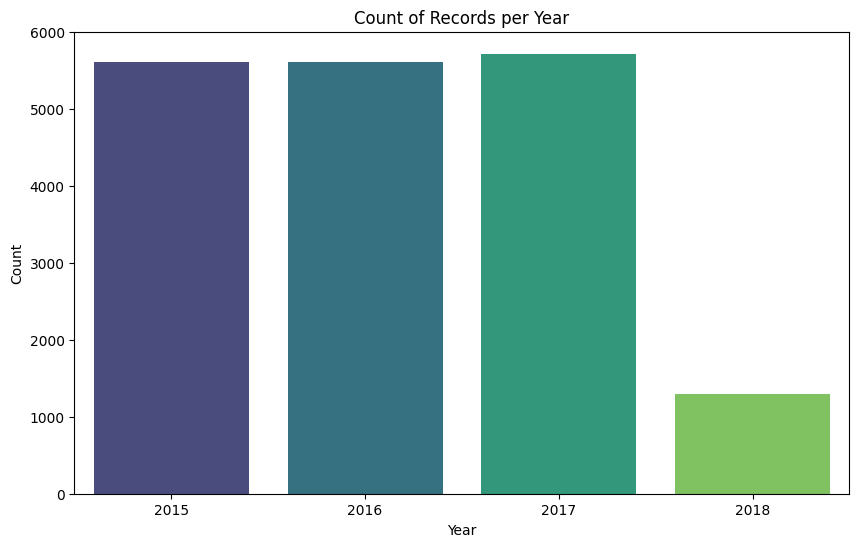

In [24]:
# Creating a countplot 
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Count of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Skewness

In [25]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
region           0.000030
Year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

The columns AveragePrice, Total Volume, 4046, 4225, and 4770 have skewness values greater than 1, indicating significant skewness in their distributions.
The skewness values for the type, region, Year, Month, and Day columns are close to 0, indicating approximately symmetric distributions.

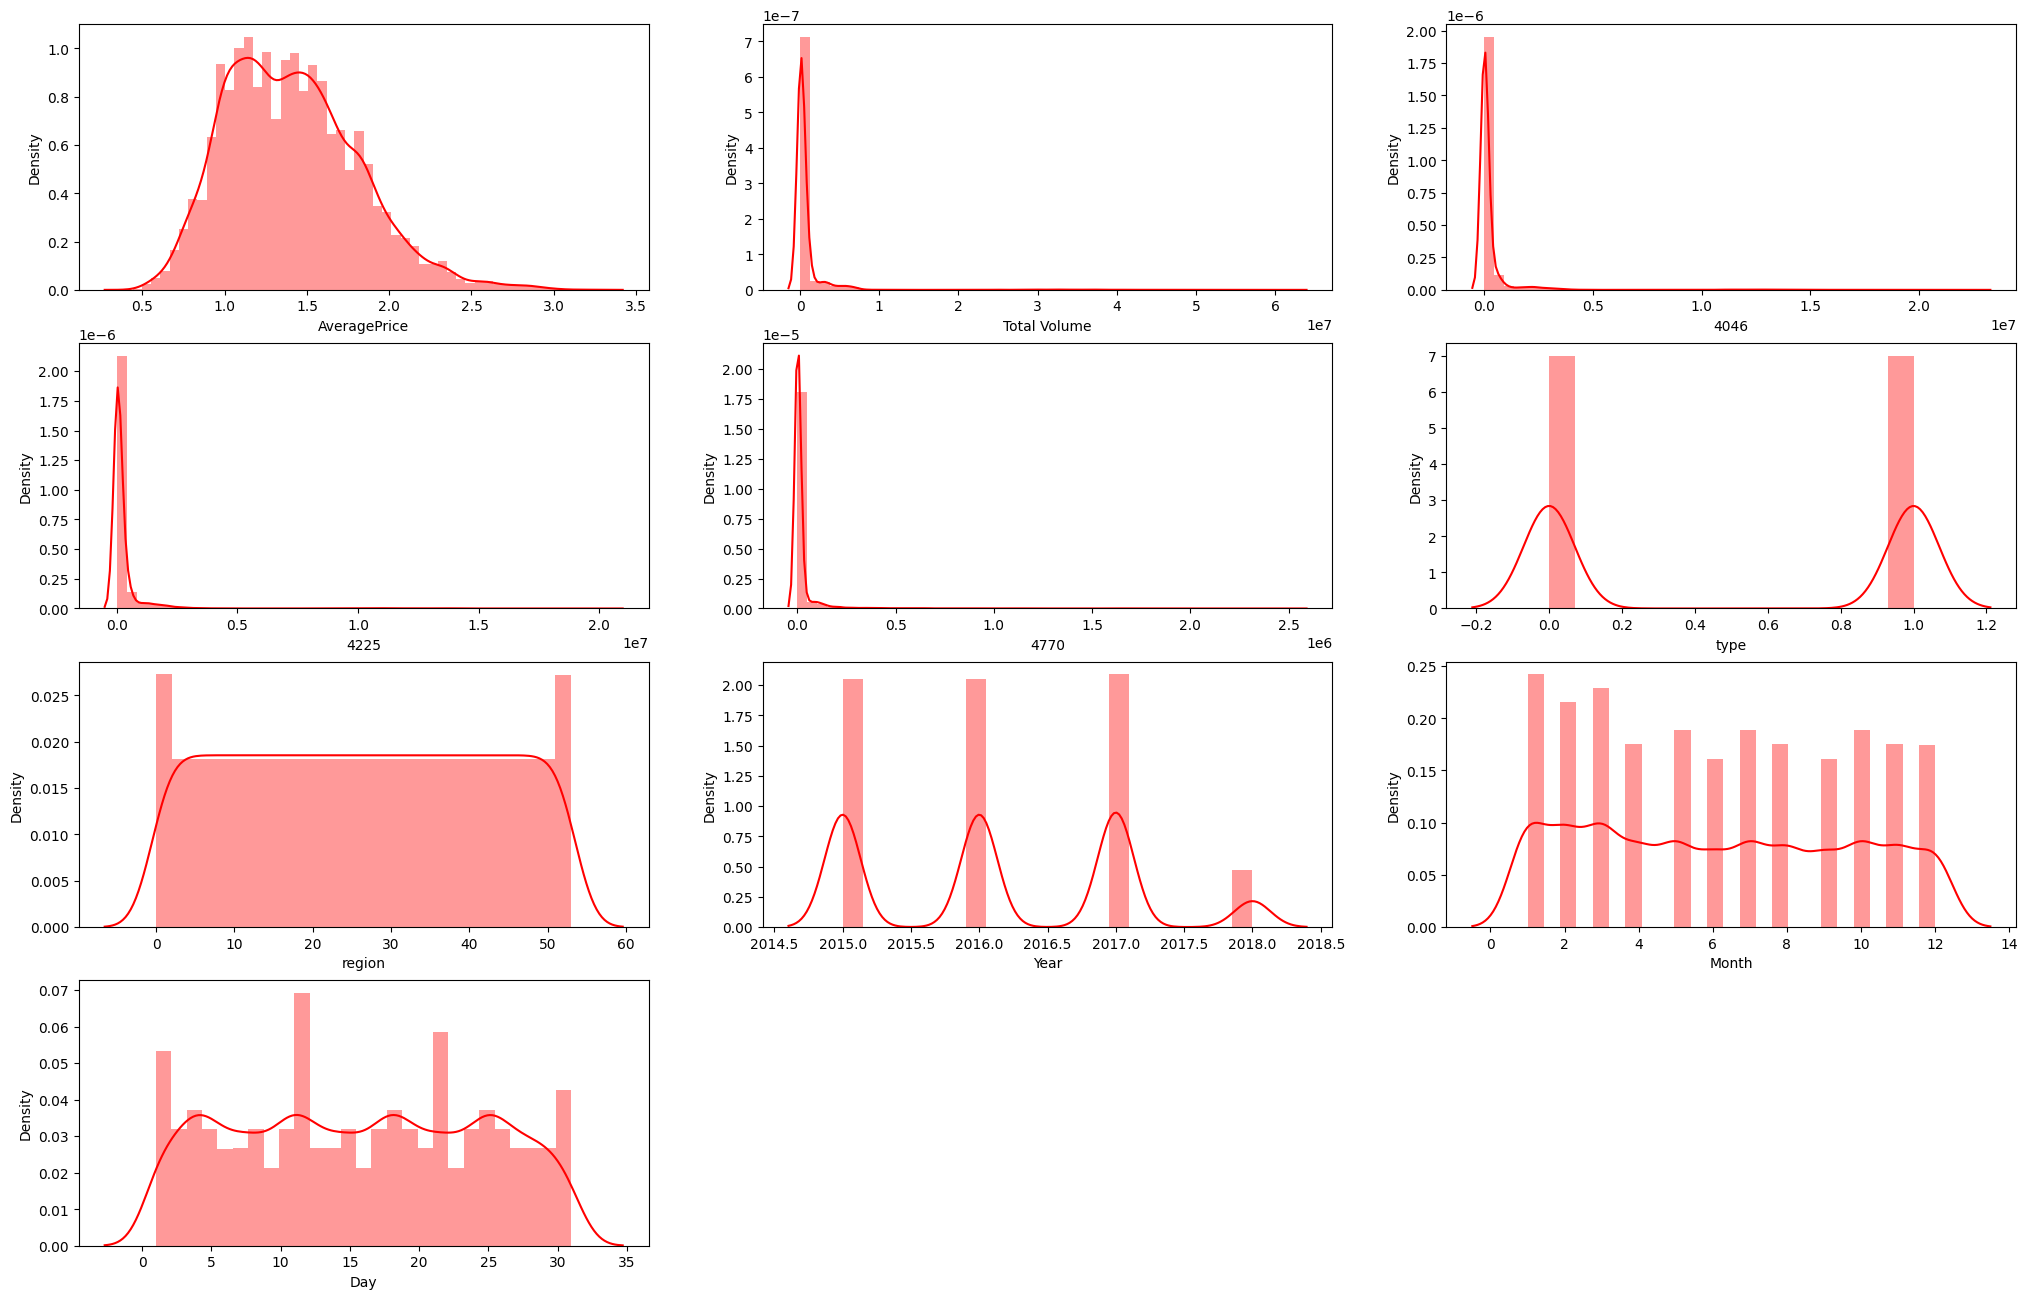

In [28]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [31]:
# Integer positions of the columns with high skewness
skewed_columns_indices = [1, 2, 3, 4]

# Applying logarithmic transformation to the specified columns
df.iloc[:, skewed_columns_indices] = np.log1p(df.iloc[:, skewed_columns_indices])


In [32]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

We can see that skewness is removed.

### Outliers

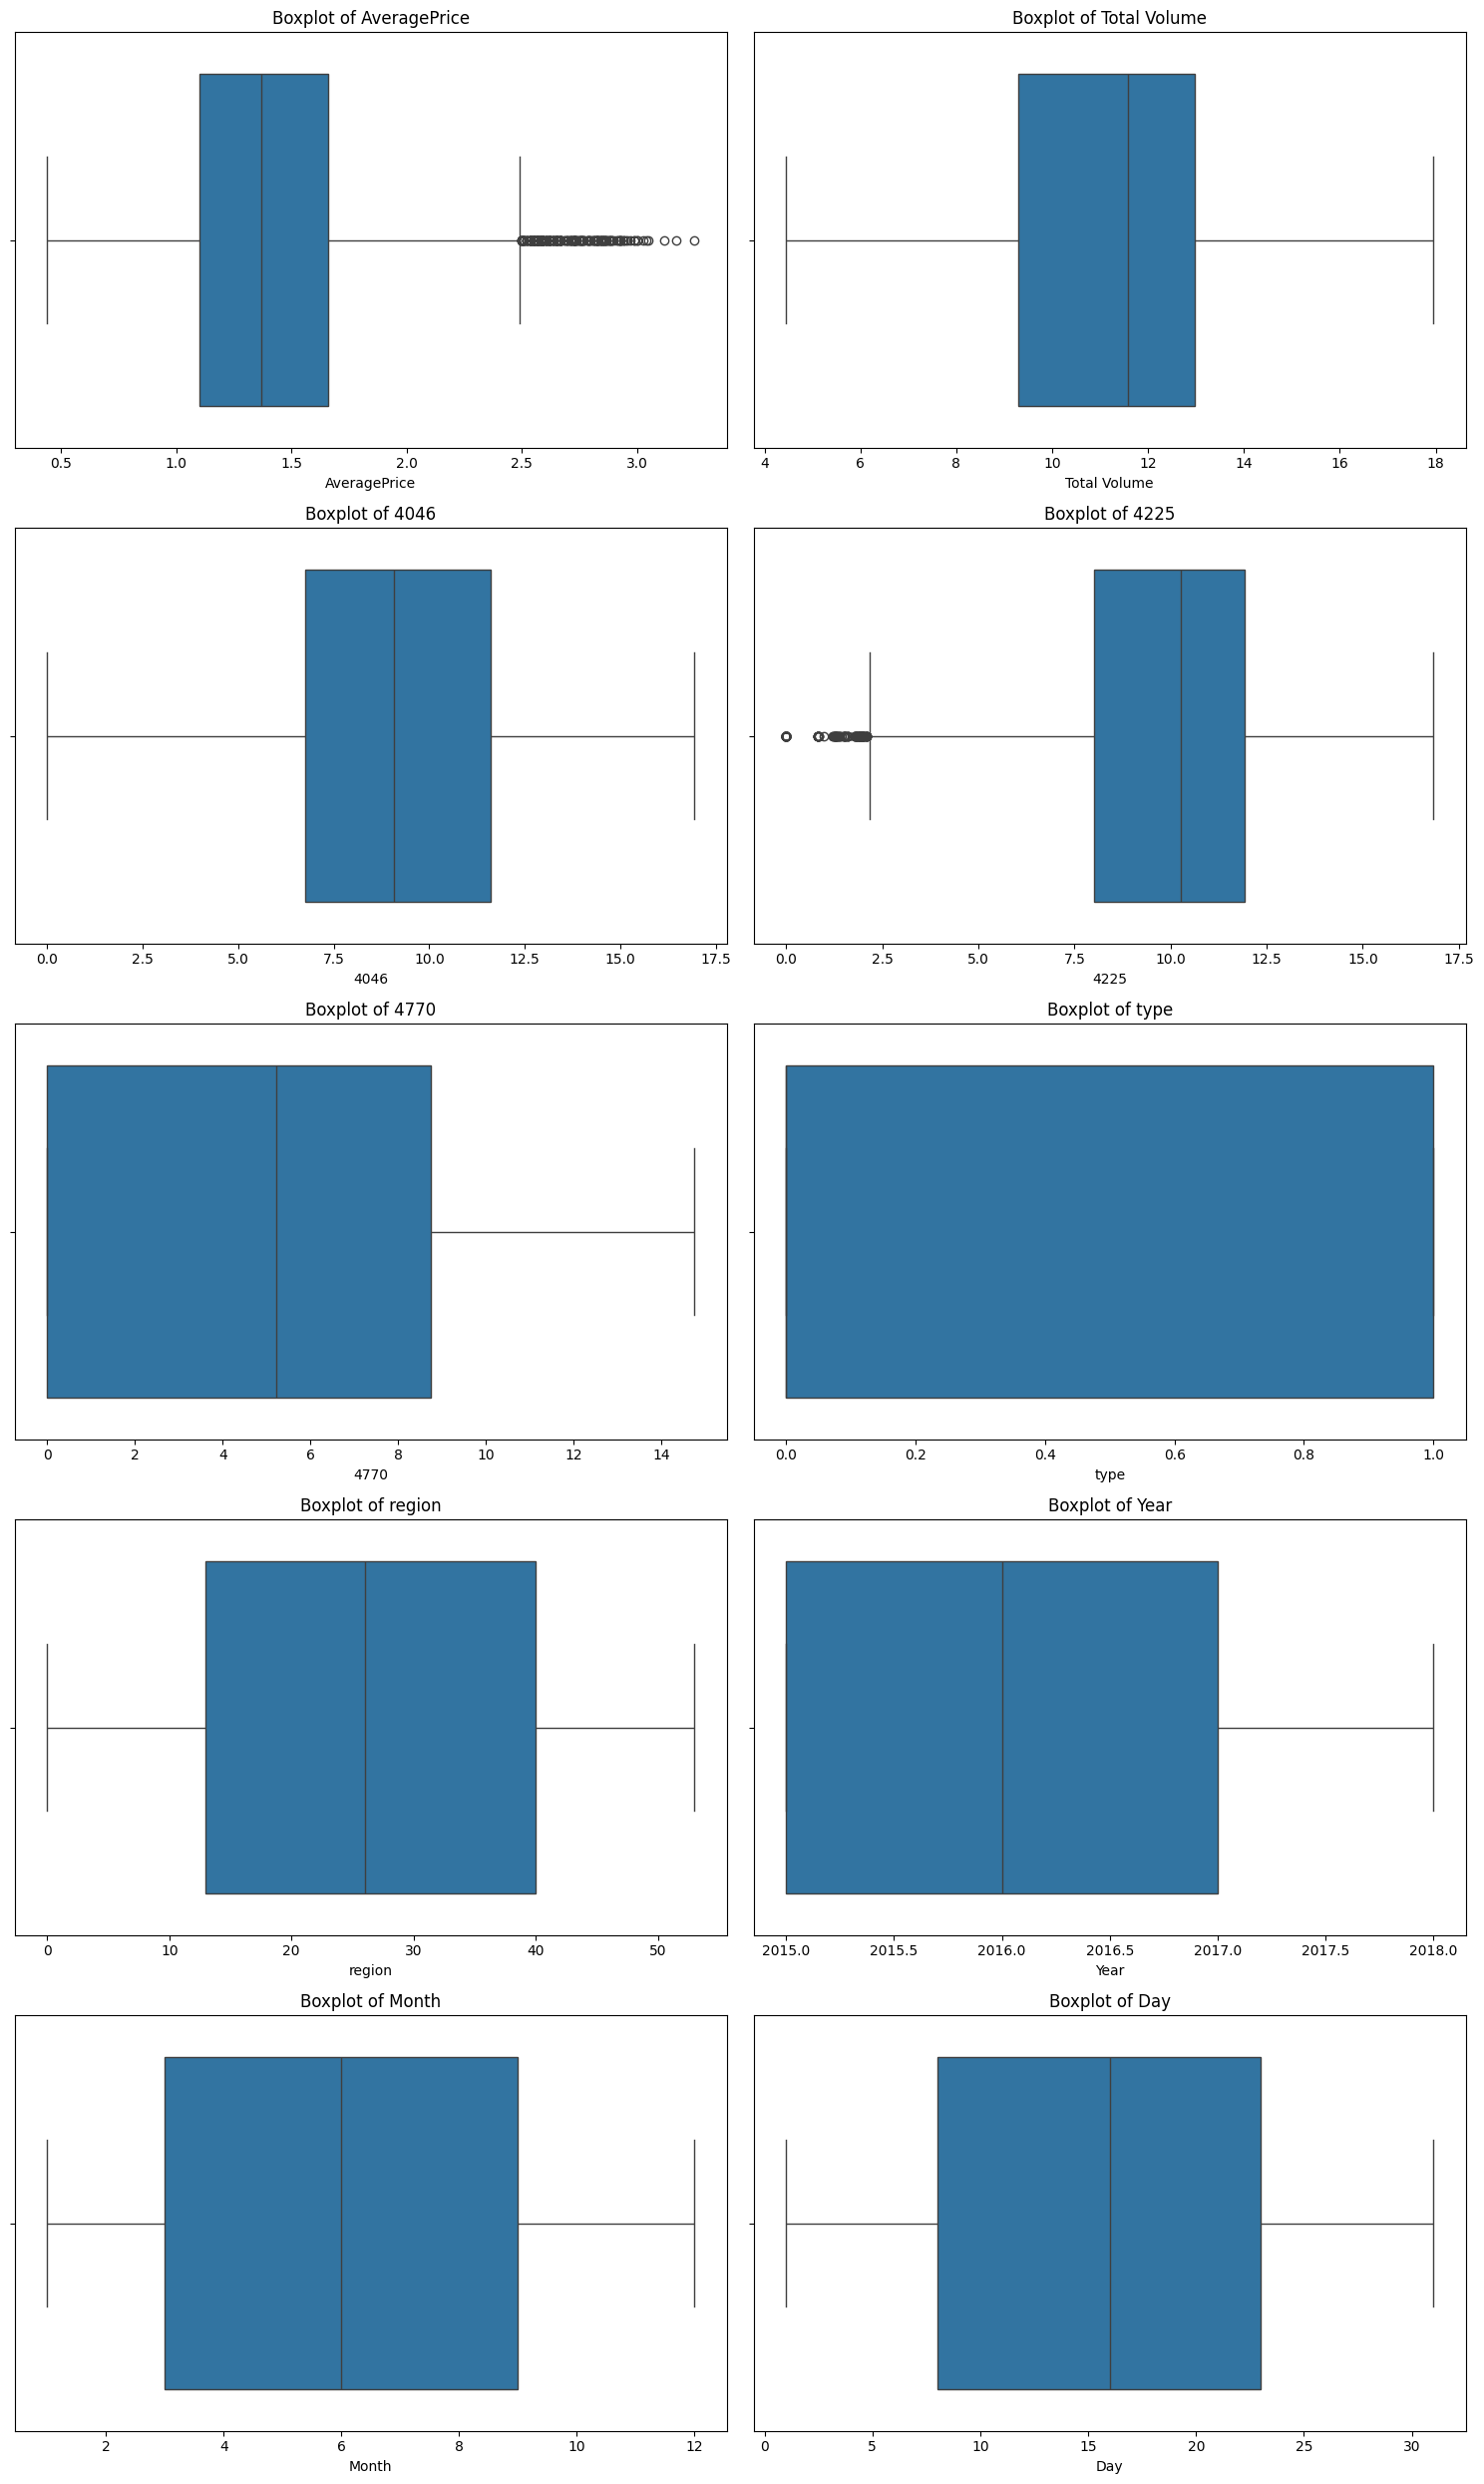

In [34]:
# list of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculating the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2 

# Creating subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flattening the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plotting boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Hide empty subplots
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


## Taking Average price as Target 

## Model Training

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Splitting the Data

In [36]:
X = df.drop('AveragePrice', axis=1)  
y = df['AveragePrice'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choosing Algorithms

In [42]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

### Training the models

In [46]:
# Converting column names to string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [47]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R-squared': r2_score(y_test, y_pred)
    }

### Performance Evaluation

In [48]:
for name, result in results.items():
    print(f"=== {name} ===")
    print(f"MAE: {result['MAE']:.4f}")
    print(f"MSE: {result['MSE']:.4f}")
    print(f"R-squared: {result['R-squared']:.4f}")
    print()

=== Linear Regression ===
MAE: 0.2210
MSE: 0.0800
R-squared: 0.5021

=== Decision Tree ===
MAE: 0.1307
MSE: 0.0414
R-squared: 0.7424

=== Random Forest ===
MAE: 0.0918
MSE: 0.0171
R-squared: 0.8934

=== Support Vector Machine ===
MAE: 0.2794
MSE: 0.1288
R-squared: 0.1980



#### From Above all Random Forest is working with greatest accuracy.

### Saving the model

In [49]:
from joblib import dump

# Training the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Saving the model to a file
model_filename = 'random_forest_model.joblib'
dump(rf_model, model_filename)

['random_forest_model.joblib']

## Taking Region as Target 

## Model Training

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Splitting the Data

In [54]:
X_classification = df.drop("region",axis=1)
y_classification = df["region"]

# Splitting the data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

### Training the model

In [55]:
# Converting column names to string type
X_train_clf.columns = X_train_clf.columns.astype(str)
X_test_clf.columns = X_test_clf.columns.astype(str)

In [56]:
from sklearn.linear_model import LogisticRegression
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier()
}

# Training and evaluating classification models
best_clf_model = None
best_clf_accuracy = 0

for name, model in classification_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f"{name} Accuracy:", accuracy)
    if accuracy > best_clf_accuracy:
        best_clf_accuracy = accuracy
        best_clf_model = model

print("Best Classification Model:", best_clf_model)


Logistic Regression Accuracy: 0.10547945205479452
Support Vector Classifier Accuracy: 0.014246575342465753
Decision Tree Classifier Accuracy: 0.7295890410958904
Random Forest Classifier Accuracy: 0.8526027397260274
K-Nearest Neighbors Classifier Accuracy: 0.176986301369863
Best Classification Model: RandomForestClassifier()


In [58]:
# Saving the best classification model 
import joblib
joblib.dump(best_clf_model, "best_classification_model.pkl")

['best_classification_model.pkl']